In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv(r"C:\Users\S.Joshi\Desktop\Data Science\DATASETS\Supervised Learning-Classification\KNN Algorithm\glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI            214 non-null float64
Na            214 non-null float64
Mg            214 non-null float64
Al            214 non-null float64
Si            214 non-null float64
K             214 non-null float64
Ca            214 non-null float64
Ba            214 non-null float64
Fe            214 non-null float64
Glass Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data['Glass Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass Type, dtype: int64

In [6]:
# Standardizing the data so that all attributes have influence on the distance calculated by KNN
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data11=data.iloc[:,:-1]
data1=sc.fit_transform(data11)
data1=pd.DataFrame(data1)
data1.columns1=data11.columns
data1.head()

C:\Users\S.Joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [7]:
data1.describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.668608e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [8]:
x=data1
y=data['Glass Type']

In [9]:
# Splitting the standardized data to train-80% and test data-20%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
# Applying the KNN Algorithm on Standardized Data
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [11]:
# Calculating the score for the Standardized Data
print("Score:",knn.score(x_test,y_test))

Score: 0.627906976744186


In [12]:
# Alternate method to calculate the score
from sklearn import metrics
print("Score:",metrics.accuracy_score(y_test,y_pred))

Score: 0.627906976744186


In [15]:
# Total Number of Mis Classifications for standardized data
print(sum(y_pred!=y_test))

16


In [16]:
# Finding out the confusion matrix for the standardized data to see how many values are incorrectly predicted
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6,  3,  0,  0,  0,  0],
       [ 7, 12,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Actual Values')

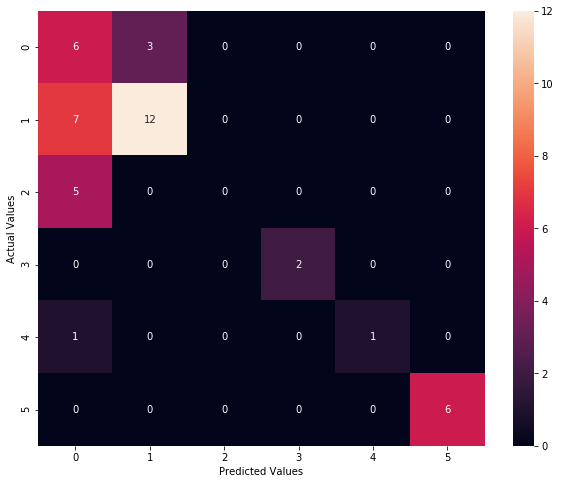

In [17]:
# Plotting Heat Map for confusion matrix
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [18]:
# Choosing the value of K
k = [i for i in range(1,41)]
error=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(sum(y_pred!=y_test))
print(error)

[14, 18, 16, 17, 17, 18, 18, 16, 16, 17, 17, 18, 17, 17, 17, 17, 17, 18, 17, 17, 18, 19, 18, 19, 19, 18, 19, 20, 20, 20, 24, 26, 27, 27, 26, 27, 26, 27, 27, 27]


Text(0.5, 1.0, 'K vs Error')

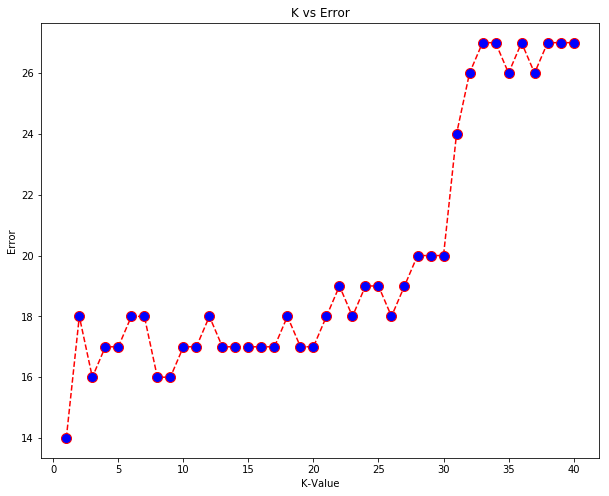

In [19]:
# Plotting the graph between the value of K and error
plt.figure(figsize=(10,8))
plt.plot(k,error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error")
plt.title("K vs Error")
# From the graph below we can see that at K=1 we are getting the minimum error of 14, so for this data it's better totake k=1

# Now checking without standardizing the data, i.e on Original Data

In [20]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [22]:
# Splitting the original data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
# Applying the KNN Algorithm to original data
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [24]:
# Calculating Score for the original data
print("Score:",knn.score(x_test,y_test))
# This score is less than the standerdised data

Score: 0.5581395348837209


In [25]:
# Confusion matrix for the original data
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 5,  3,  1,  0,  0,  0],
       [ 8, 11,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  5]], dtype=int64)

In [26]:
# Calculating total number of Mis Classification for original data
print(sum(y_pred!=y_test))
# Now it can be noted that this value is higher than obtained from standardized data

19


Text(69.0, 0.5, 'Actual Value')

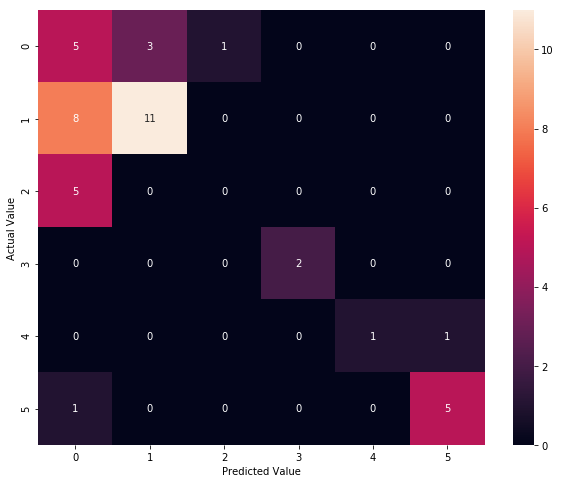

In [28]:
# Plotting heatmap for confusion matrix
plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [29]:
# Choosing value of K
k=[i for i in range(1,41)]
error=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(sum(y_test!=y_pred))
print(error)

[16, 19, 19, 19, 18, 19, 18, 18, 18, 18, 18, 18, 19, 19, 19, 18, 19, 17, 17, 18, 18, 19, 20, 19, 20, 18, 19, 20, 22, 20, 21, 21, 20, 21, 21, 21, 23, 23, 23, 22]


Text(0, 0.5, 'Error')

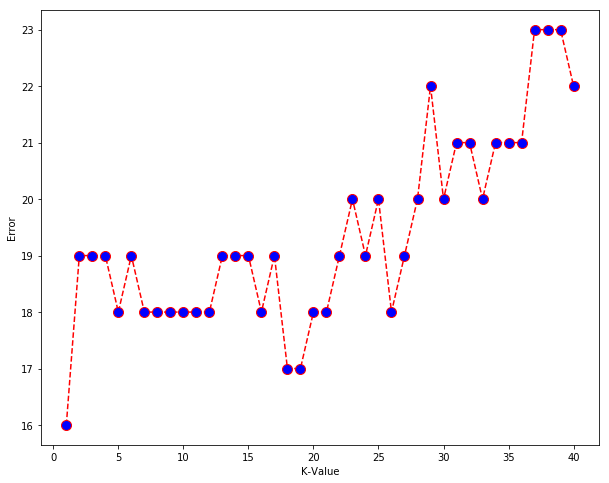

In [31]:
# Plotting the graph between the K Value and error
plt.figure(figsize=(10,8))
plt.plot(k,error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error")
# Now, here for the value K=1 we are getting the error as 16, while in the case when we standardize the data 
# we were getting the value as 14, which means that on standardizing the data we are getting less error.

# Now using MinMaxScaler for standardization

In [32]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
data11=data.iloc[:,:-1]
data1=mm.fit_transform(data11)
data1=pd.DataFrame(data1)
data1.columns1=data11.columns
data1.head()

C:\Users\S.Joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,0,1,2,3,4,5,6,7,8
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [33]:
x=data1
y=data['Glass Type']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [36]:
sum(y_pred!=y_test)

15

In [37]:
knn.score(x_test,y_test)

0.6511627906976745

In [38]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6,  3,  0,  0,  0,  0],
       [ 8, 11,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Actual Values')

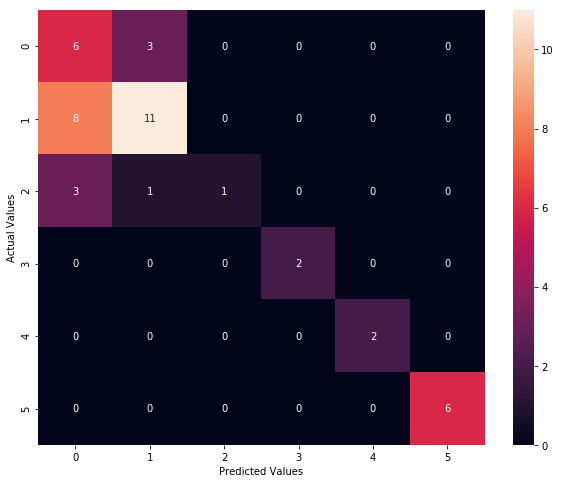

In [39]:
plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [40]:
k=[i for i in range(1,41)]
error=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(sum(y_pred!=y_test))
print(error)

[17, 15, 15, 15, 17, 16, 20, 19, 21, 18, 19, 19, 19, 18, 19, 19, 19, 19, 19, 20, 20, 19, 21, 21, 20, 21, 21, 22, 22, 23, 23, 22, 22, 22, 22, 22, 26, 24, 26, 27]


Text(0, 0.5, 'Error')

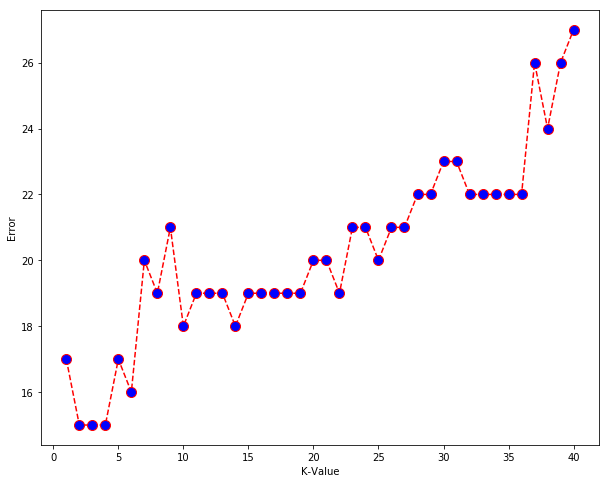

In [41]:
plt.figure(figsize=(10,8))
plt.plot(k,error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error")
# It can be seen that the minimum error here is 15 for K=3,4,5. But the minimum error obtained in Standard Scaler is 14
# So we can say that Standardization using Standard Scaler is better to use

# Now using RobustScaler for standardization

In [42]:
# Standardizing the data so that all attributes have influence on the distance calculated by KNN
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
data11=data.iloc[:,:-1]
data1=rs.fit_transform(data11)
data1=pd.DataFrame(data1)
data1.columns1=data11.columns
data1.head()

C:\Users\S.Joshi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,0,1,2,3,4,5,6,7,8
0,1.263757,0.370572,0.680135,-0.590909,-1.250774,-1.015385,0.160858,0.0,0.0
1,-0.026565,0.643052,0.080808,0.000000,-0.074303,-0.153846,-0.825737,0.0,0.0
2,-0.569260,0.250681,0.047138,0.409091,0.247678,-0.338462,-0.879357,0.0,0.0
3,-0.007590,-0.098093,0.141414,-0.159091,-0.222910,0.030769,-0.407507,0.0,0.0
4,-0.098672,-0.032698,0.094276,-0.272727,0.359133,-0.010256,-0.568365,0.0,0.0


In [43]:
x=data1
y=data['Glass Type']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [46]:
knn.score(x_test,y_test)

0.5813953488372093

In [47]:
sum(y_pred!=y_test)

18

In [48]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 6,  3,  0,  0,  0,  0],
       [ 8, 11,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Actual Values')

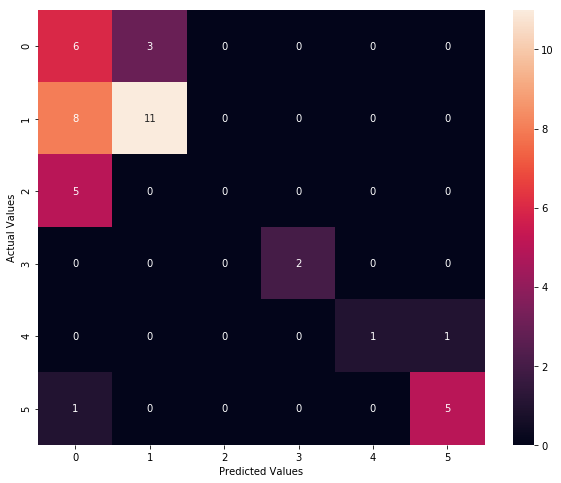

In [49]:
plt.figure(figsize=(10,8))
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [50]:
k=[i for i in range(1,41)]
error=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error.append(sum(y_pred!=y_test))
print(error)

[14, 17, 18, 18, 18, 16, 17, 18, 17, 19, 18, 18, 17, 17, 17, 17, 19, 17, 19, 18, 18, 18, 17, 19, 19, 17, 19, 19, 19, 20, 21, 23, 21, 23, 24, 24, 23, 24, 24, 24]


Text(0, 0.5, 'Error')

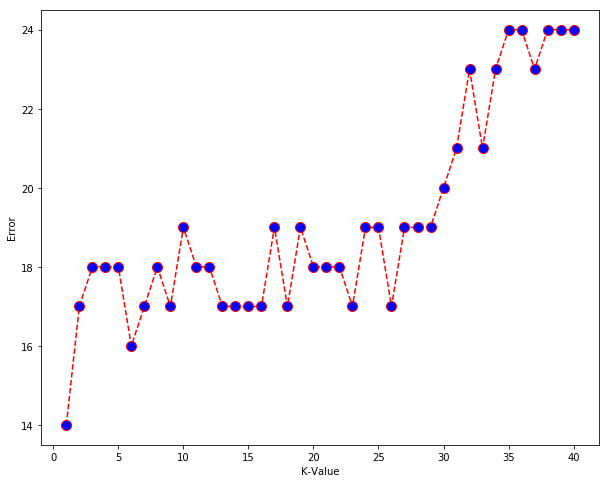

In [51]:
plt.figure(figsize=(10,8))
plt.plot(k,error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel("K-Value")
plt.ylabel("Error")
# Now most importantly here for the value of k=1 there is the minimum error of 14 which is same as that obtained in the
# Standard Scaler. But he maximum error is only 24 which is less than all 3 other Standardization techniques. 
# By using the Robust Scaler we are getting the minimum error also and our error value is not high much
# This shows that we can use the RobustScaler for Standardization with the value of k=1